Question 7 -

Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the JSON data into a pandas DataFrame
url = "https://data.nasa.gov/resource/y77d-th95.json"
try:
    df = pd.read_json(url)
except pd.errors.JSONDecodeError as e:
    print("Error occurred while loading the data:", e)
    exit(1)

In [3]:
# Convert the 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['year'].dt.year < 2000]

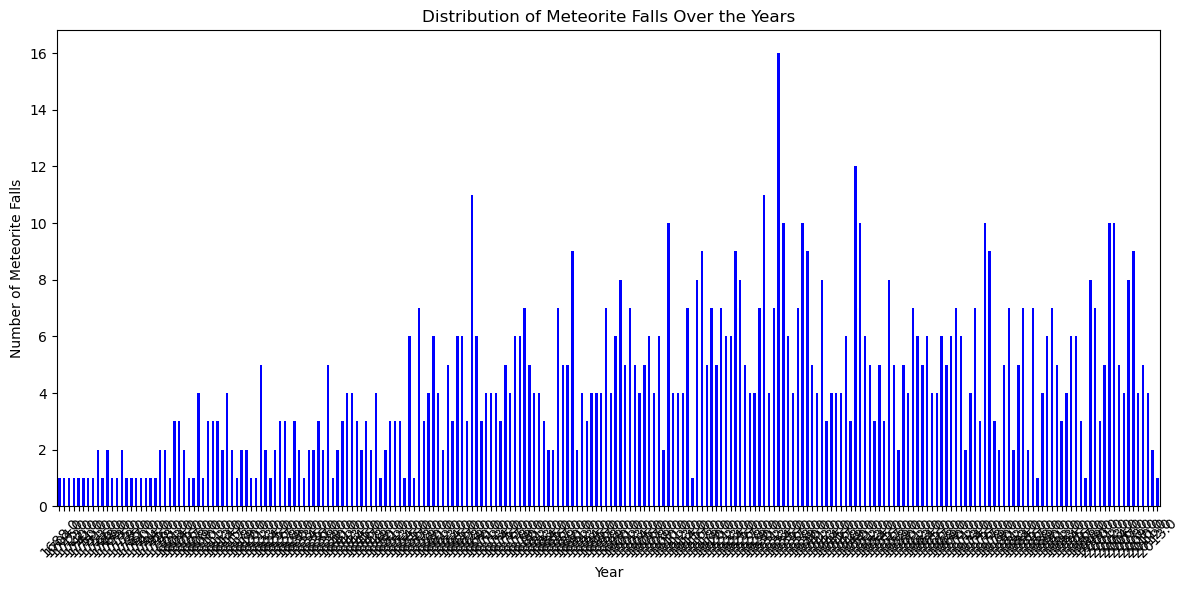

In [4]:
# Plot the distribution of meteorite falls over the years
meteorite_counts_by_year = df['year'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
meteorite_counts_by_year.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Meteorite Falls')
plt.title('Distribution of Meteorite Falls Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Get all the Earth meteorite coordinates that fell before the year 1970
earth_meteorite_coordinates_before_1970 = df[df['year'].dt.year < 1970][['reclat', 'reclong']]


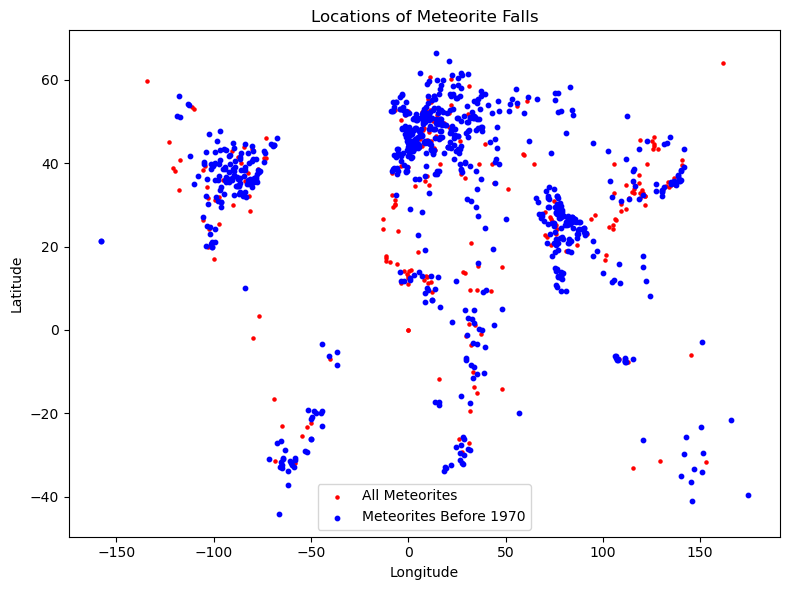

In [6]:
# Plot the locations of meteorite falls on a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['reclong'], df['reclat'], s=5, color='red')
plt.scatter(earth_meteorite_coordinates_before_1970['reclong'], earth_meteorite_coordinates_before_1970['reclat'], s=10, color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of Meteorite Falls')
plt.legend(['All Meteorites', 'Meteorites Before 1970'])
plt.tight_layout()
plt.show()

In [9]:
# Get all the Earth meteorites with mass greater than 10000 kg
earth_meteorites_mass_gt_10000 = df[df['mass'] > 10000]

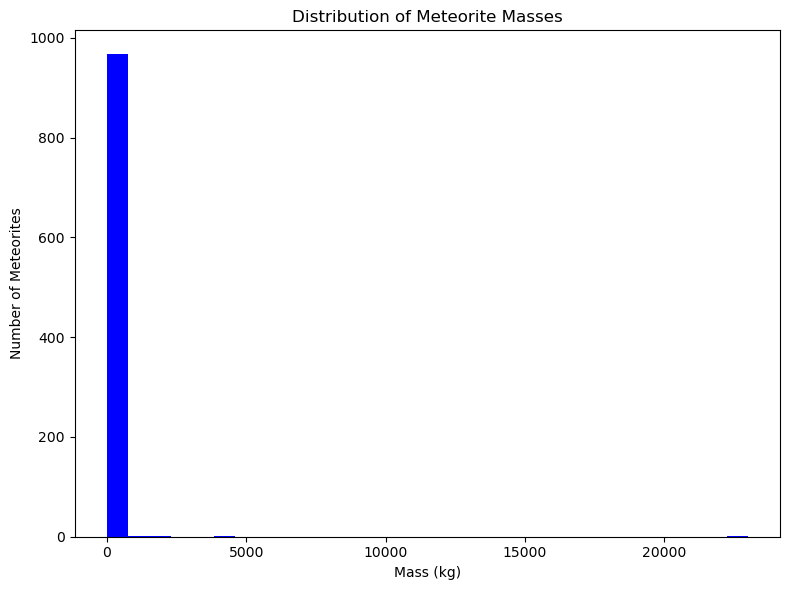

In [11]:
# Plot a histogram of meteorite masses
plt.figure(figsize=(8, 6))
plt.hist(df['mass'] / 1000, bins=30, color='blue')
plt.xlabel('Mass (kg)')
plt.ylabel('Number of Meteorites')
plt.title('Distribution of Meteorite Masses')
plt.tight_layout()
plt.show()

In [12]:
# Print the results
print("Earth meteorites that fell before the year 2000:")
print(earth_meteorites_before_2000)
print()

print("Earth meteorite coordinates that fell before the year 1970:")
print(earth_meteorite_coordinates_before_1970)
print()

print("Earth meteorites with mass greater than 10000 kg:")
print(earth_meteorites_mass_gt_10000)

Earth meteorites that fell before the year 2000:
          name     id nametype     recclass      mass  fall       year  \
0       Aachen      1    Valid           L5      21.0  Fell 1880-01-01   
1       Aarhus      2    Valid           H6     720.0  Fell 1951-01-01   
2         Abee      6    Valid          EH4  107000.0  Fell 1952-01-01   
3     Acapulco     10    Valid  Acapulcoite    1914.0  Fell 1976-01-01   
4      Achiras    370    Valid           L6     780.0  Fell 1902-01-01   
..         ...    ...      ...          ...       ...   ...        ...   
994   Timochin  24004    Valid           H5   65500.0  Fell 1807-01-01   
995   Tirupati  24009    Valid           H6     230.0  Fell 1934-01-01   
997      Tjabe  24011    Valid           H6   20000.0  Fell 1869-01-01   
998   Tjerebon  24012    Valid           L5   16500.0  Fell 1922-01-01   
999  Tomakovka  24019    Valid          LL6     600.0  Fell 1905-01-01   

       reclat    reclong                                      